![ieseg logo](./img/ieseg.png)

#### MBD 2021-2022
# Statistical & Machine Learning Approaches for Marketing

## Section 5: Support Vector Machine

### 1. Import all required libraries and datasets

In [3]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)

Warning message:
"package 'mlr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'mlr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'pillar'


In [4]:
install.packages('e1071')


  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6  1.7-9              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mmarcosiglesias\AppData\Local\Temp\Rtmp4wczBB\downloaded_packages


### 2. Hyperplane separating

In [5]:
# Generate sample data for 2-classes, separable
set.seed(1)
x <- matrix(rnorm(100 * 2), ncol=2)  # X1, X2
y <- c(rep(-1, 10), rep(1, 10))  # Class
x[y == 1, ] <- x[y == 1, ] + 3.5  # Moving this data group to the top-right corner

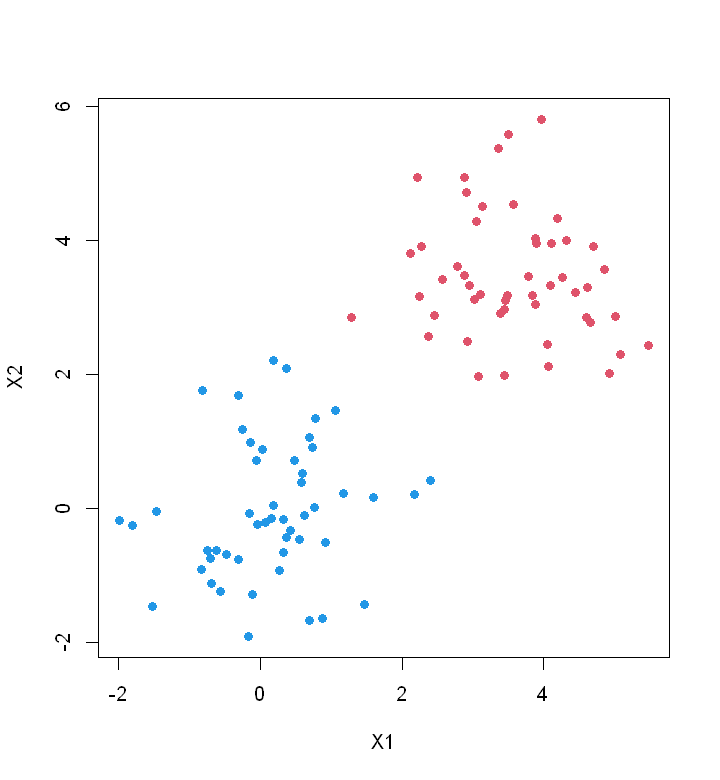

In [8]:
# Plot the sample data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(1, 2)], col=(3 - y), pch=19, xlab='X1', ylab='X2')

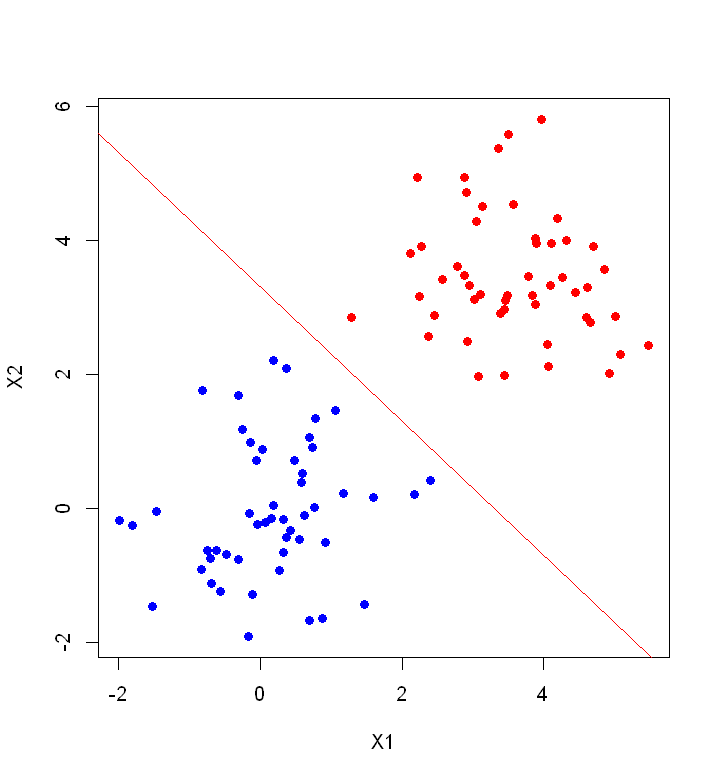

In [6]:
# Plot the sample data with some possible separating hyperplanes
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(1, 2)], col=(3 - y), pch=19, xlab='X1', ylab='X2')
abline(a=3.3, b=-1.0, col='red')  # Decision boudary 1, a = beta0, b = beta1

**Example 1:** Modify the abline() function to find and plot 2 other separating hyperplanes.

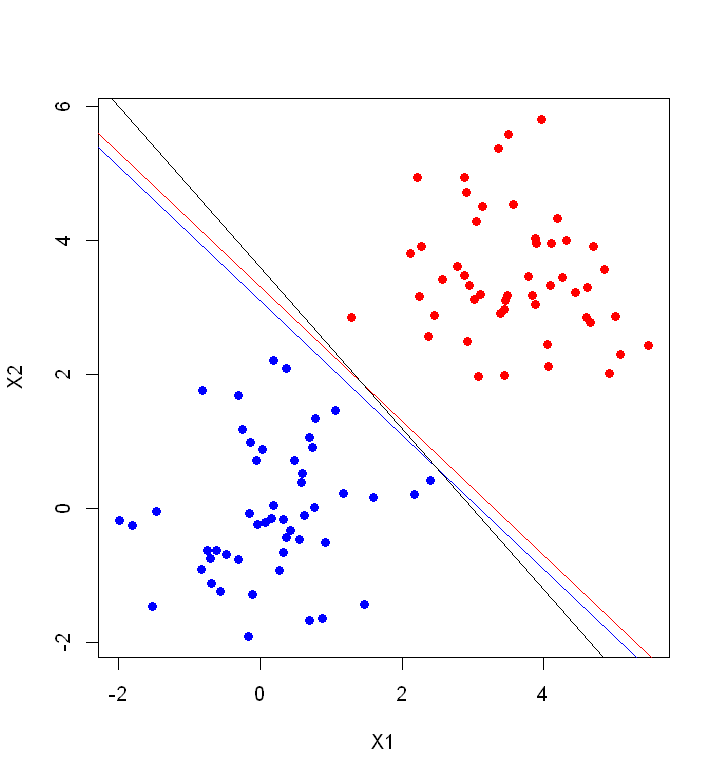

In [7]:
# Plot the sample data with some possible separating hyperplanes
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(1, 2)], col=(3 - y), pch=19, xlab='X1', ylab='X2')
abline(a=3.3, b=-1.0, col='red')  # Decision boudary 1
abline(a=3.1, b=-1.0, col='blue')  # Decision boudary 2
abline(a=3.6, b=-1.2, col='black')  # Decision boudary 3

### 3. Maximal Margin Classifier (hard margin)

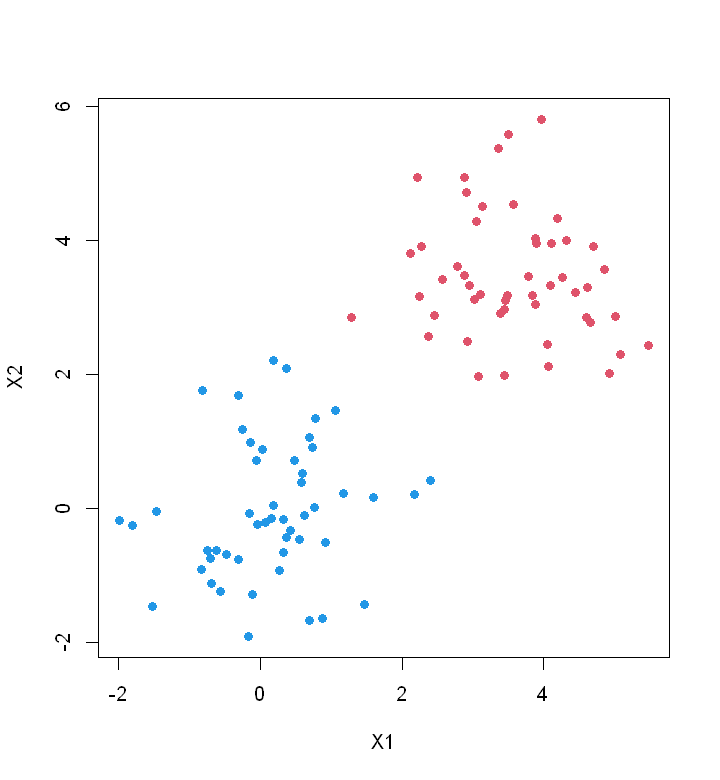

In [11]:
# Plot the sample data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(1, 2)], col=(3 - y), pch=19, xlab='X1', ylab='X2')

In [12]:
# Train the Maximal Margin Classifier model
dat <- data.frame(x=x, y=as.factor(y))
md_maxmargin <- svm(y ~ ., data=dat, kernel='linear', cost=1e5, scale=F)  # Very high cost, so no miss-classifying toleration

In [13]:
# Extract the coefficients of decision boudary
beta0 <- -md_maxmargin$rho
beta <- drop(t(md_maxmargin$coefs) %*% (x[md_maxmargin$index, ]))

print(paste('Intercept =', beta0))
print(paste('Coefficent =', paste(beta, collapse=' ')))

[1] "Intercept = 4.15057334330742"
[1] "Coefficent = -1.07789559545691 -1.32137148791704"


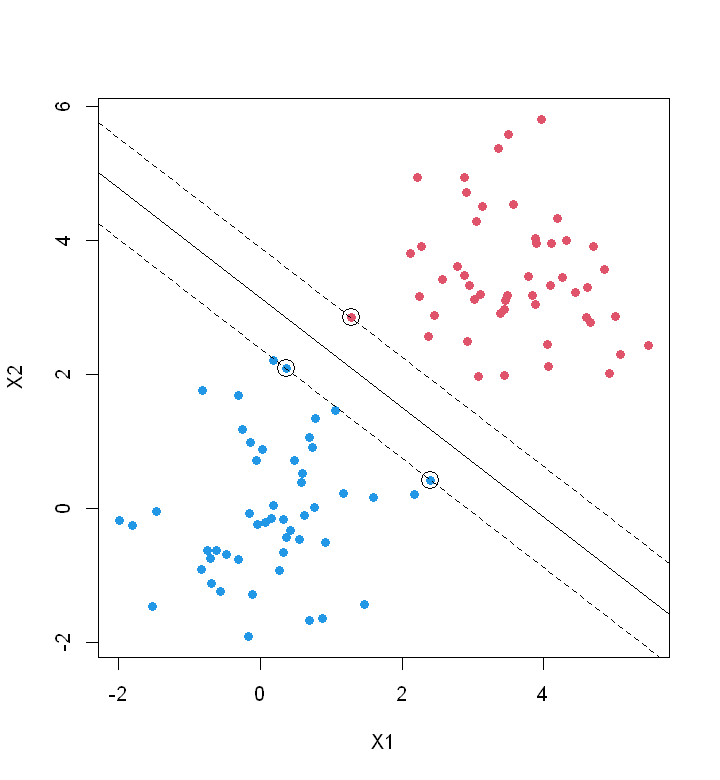

In [14]:
# Plot the sample data with the separating hyperplane

# Plot data points
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(1, 2)], col=(3 - y), pch=19, xlab='X1', ylab='X2')

# Plot the SVC
abline(-beta0 / beta[2], -beta[1] / beta[2])  # Decision boudary
abline((-beta0 - 1) / beta[2], -beta[1] / beta[2], lty=2)  # Upper margin
abline((-beta0 + 1) / beta[2], -beta[1] / beta[2], lty=2)  # Lower margin

# Plot the support vectors
points(x[md_maxmargin$index, c(1, 2)], cex=2, pch=1)

### 4. Support Vector Classifier (soft margin)

In [15]:
# Train the Maximal Margin Classifier model
dat <- data.frame(x=x, y=as.factor(y))
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=0.1, scale=F)  # Low cost, so allowing some miss-classifying

In [16]:
# Extract the coefficients of decision boudary
beta0 <- -md_svc$rho
beta <- drop(t(md_svc$coefs) %*% (x[md_svc$index, ]))

print(paste('Intercept =', beta0))
print(paste('Coefficent =', paste(beta, collapse=' ')))

[1] "Intercept = 2.32012649925928"
[1] "Coefficent = -0.603472591610074 -0.625731291063094"


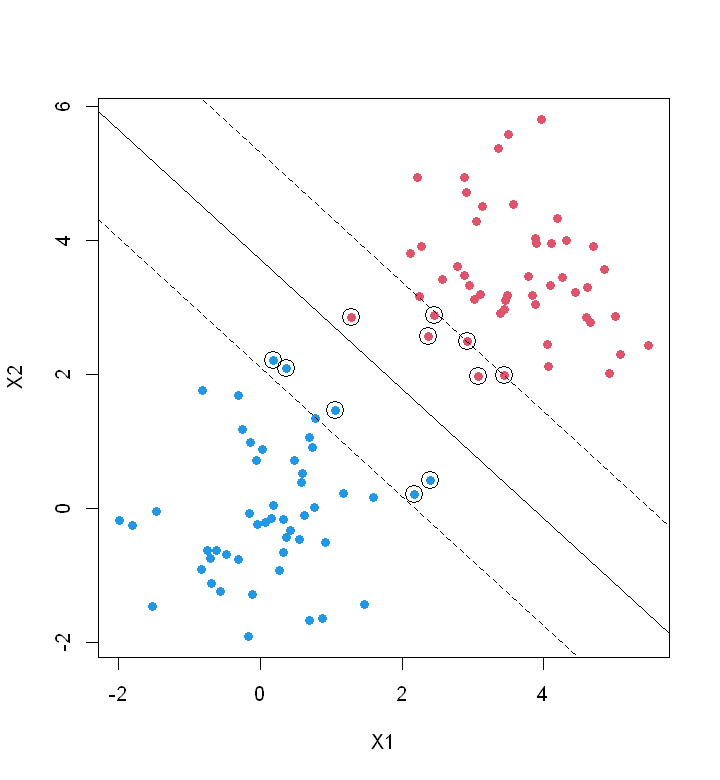

In [17]:
# Plot the sample data with the separating hyperplane

# Plot data points
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(1, 2)], col=(3 - y), pch=19, xlab='X1', ylab='X2')

# Plot the SVC
abline(-beta0 / beta[2], -beta[1] / beta[2])  # Decision boudary
abline((-beta0 - 1) / beta[2], -beta[1] / beta[2], lty=2)  # Upper margin
abline((-beta0 + 1) / beta[2], -beta[1] / beta[2], lty=2)  # Lower margin

# Plot the support vectors
points(x[md_svc$index, c(1, 2)], cex=2, pch=1)

## Lab: Support Vector Machines

1. Support Vector Classifier (SVC)
2. Support Vector Machines (SVM)
3. SVM with multiple classes
4. Gene Expression Data

### Lab 1: Support Vector Classifier

Dataset 1: Non-linear separable data

- Q1: Fit Support Vector Classifier (SVC, soft margin) to the data.
- Q2: Tune the cost parameter. What is the best value?

Dataset 2: Linear separable data

- Q3: Fit a Maximal Margin Classifier (hard margin) to the data.
- Q4: Fit a Support Vector Classifier (soft margin) to the data.

**Dataset 1: Non-linear separable data**

In [18]:
# Load require libraries
library(e1071)  # SVM

In [19]:
# Generate sample data for 2-classes
set.seed(1)
x <- matrix(rnorm(20 * 2), ncol=2)
y <- c(rep(-1, 10), rep(1, 10))
x[y == 1, ] <- x[y == 1, ] + 1  # Moving this data group to the top-right corner

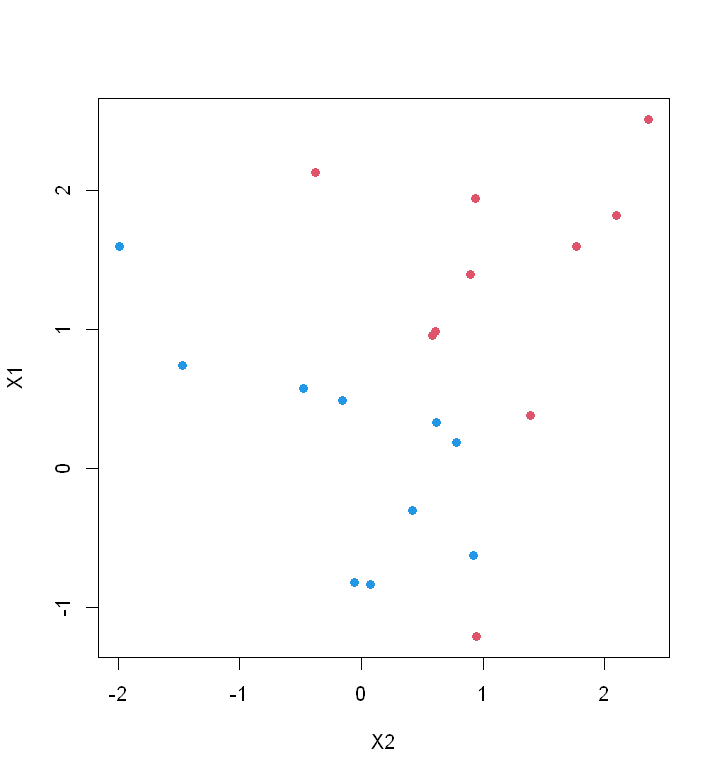

In [20]:
# Plot the sample data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(2, 1)], col=(3 - y), pch=19, xlab='X2', ylab='X1')

**Q1: Fit Support Vector Classifier (SVC, soft margin) to the data.**

In [21]:
# Prepare data to fit the model
dat <- data.frame(x=x, y=as.factor(y))

# Fit Support Vector Classifier (SVM with linear kernel)
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=10, scale=F)

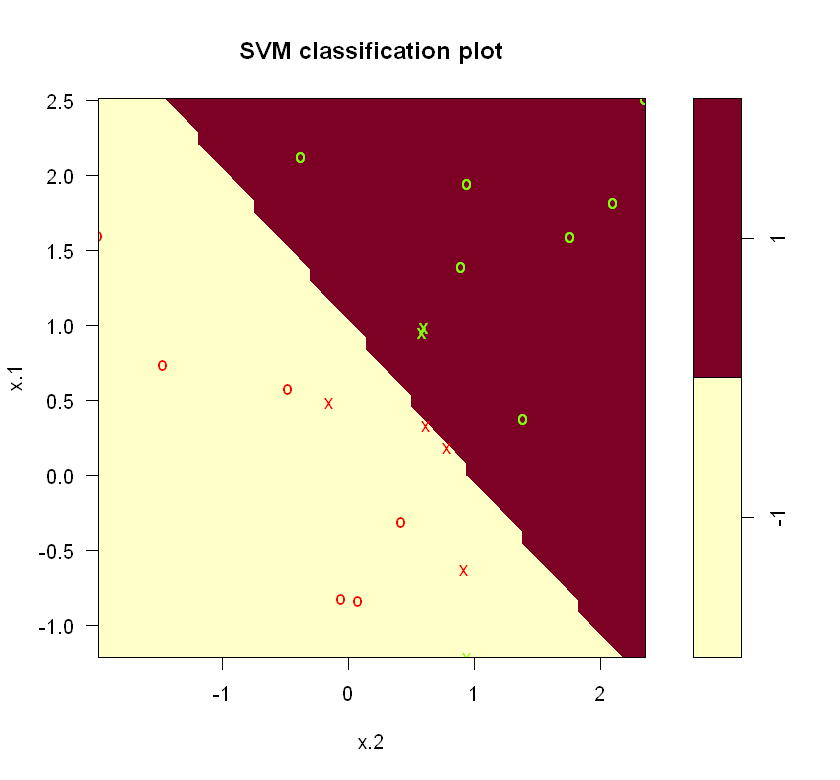

In [22]:
# Plot the model result
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svc, dat, symbolPalette=rainbow(4))

In [23]:
# Summary the model
summary(md_svc)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = F)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




In [24]:
# Show the index of the support vectors
length(md_svc$index)
md_svc$index

[1] 7

[1]  1  2  5  7 14 16 17

In [25]:
# Extract the coefficients of decision boudary
beta0 <- -md_svc$rho
beta <- drop(t(md_svc$coefs) %*% (x[md_svc$index, ]))

print(paste('Intercept =', beta0))
print(paste('Coefficent =', paste(beta, collapse=' ')))

[1] "Intercept = 1.50670652346111"
[1] "Coefficent = -1.55554715849029 -1.61153393128807"


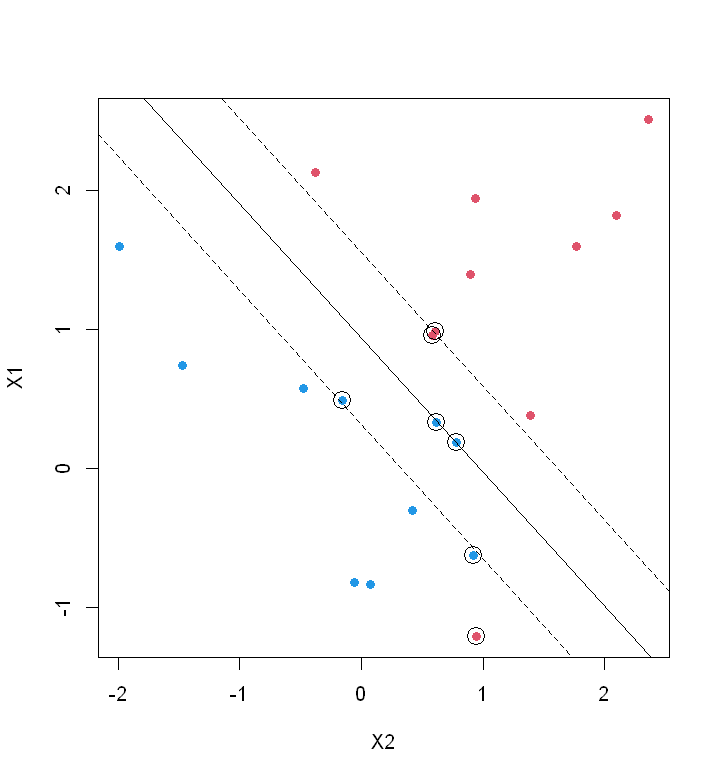

In [26]:
# Plot the SVC model result

# Plot data points
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(2, 1)], col=(3 - y), pch=19, xlab='X2', ylab='X1')

# Plot the SVC
abline(-beta0 / beta[2], -beta[1] / beta[2])  # Decision boudary
abline((-beta0 - 1) / beta[2], -beta[1] / beta[2], lty=2)  # Upper margin
abline((-beta0 + 1) / beta[2], -beta[1] / beta[2], lty=2)  # Lower margin

# Plot the support vectors
points(x[md_svc$index, c(2, 1)], cex=2, pch=1)

**Q2: Tune the cost parameter. What is the best value?**

In [27]:
# Fit Support Vector Classifier (SVM with linear kernel) with smaler cost
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=0.1, scale=F)

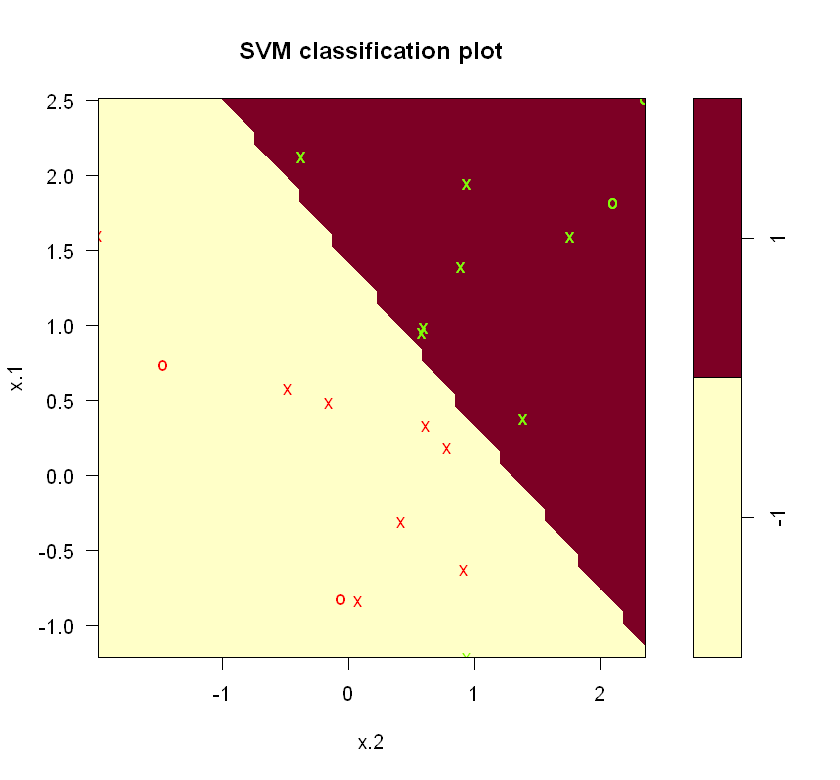

In [28]:
# Plot the new model
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svc, dat, symbolPalette=rainbow(4))

In [29]:
# More support vectors (the margin is wider)
length(md_svc$index)
md_svc$index

[1] 16

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

In [30]:
# Tuning parameter: cost
set.seed(1)
tune_svc <- tune(svm, y ~ ., data=dat, kernel='linear',
                 ranges=list(cost=c(0.001, 0.01, 0.1, 1.5, 10, 100)))

In [31]:
# Summary the tuned models
summary(tune_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
     cost error dispersion
1   0.001  0.55  0.4377975
2   0.010  0.55  0.4377975
3   0.100  0.05  0.1581139
4   1.500  0.15  0.2415229
5  10.000  0.15  0.2415229
6 100.000  0.15  0.2415229


In [32]:
# Show the best model
best_svc <- tune_svc$best.model
summary(best_svc)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1.5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [33]:
# Prepare the test data
xtest <- matrix(rnorm(20 * 2), ncol=2)
ytest <- sample(c(-1, 1), 20, rep=T)
xtest[ytest == 1, ] <- xtest[ytest == 1, ] + 1
testdat <- data.frame(x=xtest, y=as.factor(ytest))

In [34]:
# Make prediction using the best tuned model
ypred <- predict(best_svc, testdat)

# Evaluation
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  9 1
     1   2 8

In [35]:
# Make prediction using other SVC model
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=0.01, scale=F)
ypred <- predict(md_svc, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  6
     1   0  3

**Dataset 2: Linearly separable data**

In [36]:
# Generate linearly separable sample data for 2-classes
set.seed(1)
x <- matrix(rnorm(20 * 2), ncol=2)
y <- c(rep(-1, 10), rep(1, 10))
x[y == 1, ] <- x[y == 1, ] + 1.5  # Moving this data group to the top-right corner

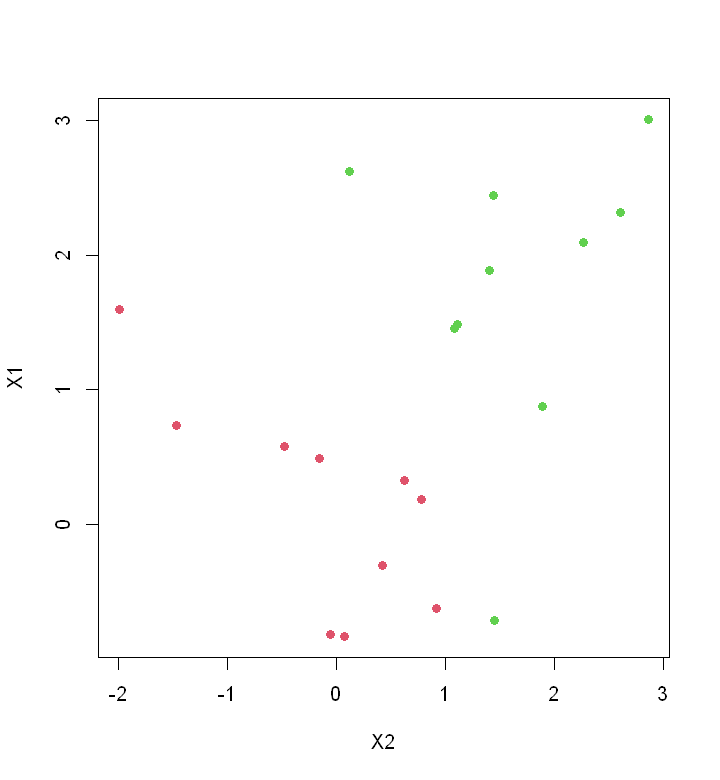

In [37]:
# Plot the data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(2, 1)], col=(y + 5)/2, pch=19, xlab='X2', ylab='X1')

**Q3: Fit a Maximal Margin Classifier (hard margin) to the data.**

In [38]:
# Prepare data for SVC model
dat <- data.frame(x=x, y=as.factor(y))

# Fit the SVC model
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=1e5)  # Very high cost
summary(md_svc)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




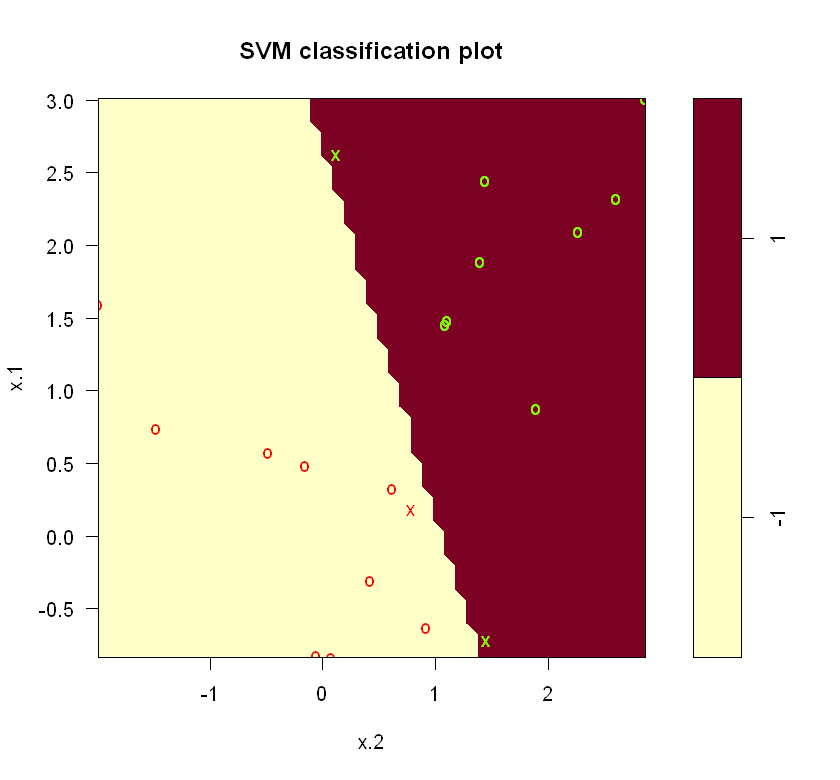

In [39]:
# Plot the model (no trainig error)
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svc, dat, symbolPalette=rainbow(4))

In [40]:
# Check training error: no training error
ypred <- predict(md_svc, dat)
table(predict=ypred, truth=dat$y)

       truth
predict -1  1
     -1 10  0
     1   0 10

In [41]:
# Check test error
ypred <- predict(md_svc, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  9 4
     1   2 5

**Q4: Fit a Support Vector Classifier (soft margin) to the data.**


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




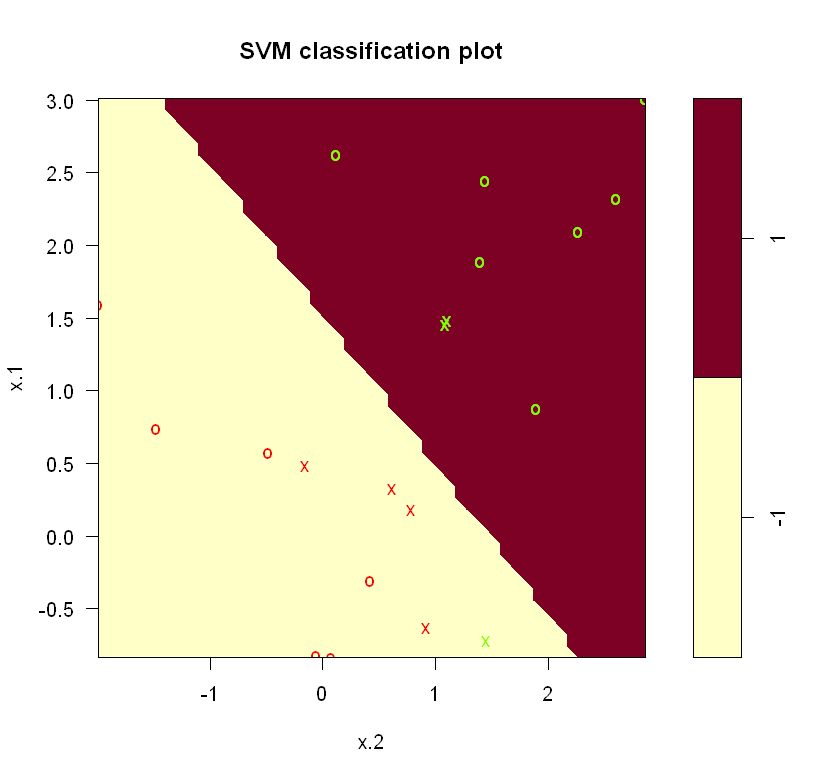

In [42]:
# Fit new SVC model with smaller cost
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=1)
summary(md_svc)

# Plot the new model
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svc, dat, symbolPalette=rainbow(4))

In [43]:
# Check test error (better than large cost)
ypred <- predict(md_svc, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  9 2
     1   2 7

### Lab 2: Support Vector Machines (non-linear kernel)

**2.1. SVM with radial kernel**

In [44]:
# Generate some data
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol=2)

# Create 3 group of data by shifting 2 groups to top-right and bottom-left corners
x[1:100, ] <- x[1:100, ] + 2  # Shift 100 data points to the top-right corner
x[101:150, ] <- x[101:150, ] - 2  # Shift 50 data points to the bottom-left corner
y <- c(rep(1, 150), rep(2, 50))  # Add class 1 and 2

In [45]:
# Full data
dat <- data.frame(x=x, y=as.factor(y))
head(dat)

# Train data index
set.seed(1)
train <- sample(200, 100)

,x.1,x.2,y
,<dbl>,<dbl>,<fct>
1,1.373546,2.4094018,1
2,2.183643,3.6888733,1
3,1.164371,3.5865884,1
4,3.595281,1.6690922,1
5,2.329508,-0.2852355,1
6,1.179532,4.4976616,1


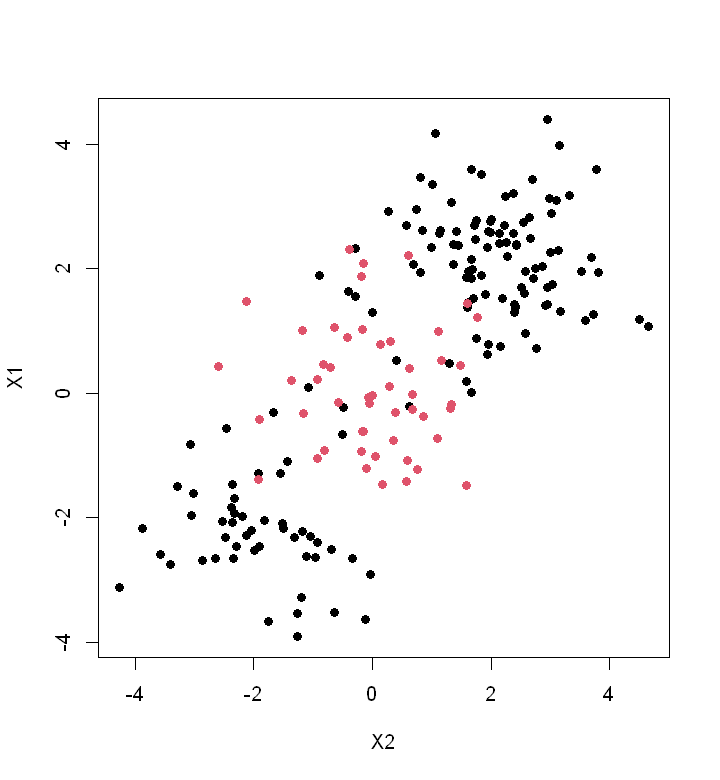

In [46]:
# Plot the data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(2, 1)], col=y, pch=19, xlab='X2', ylab='X1')

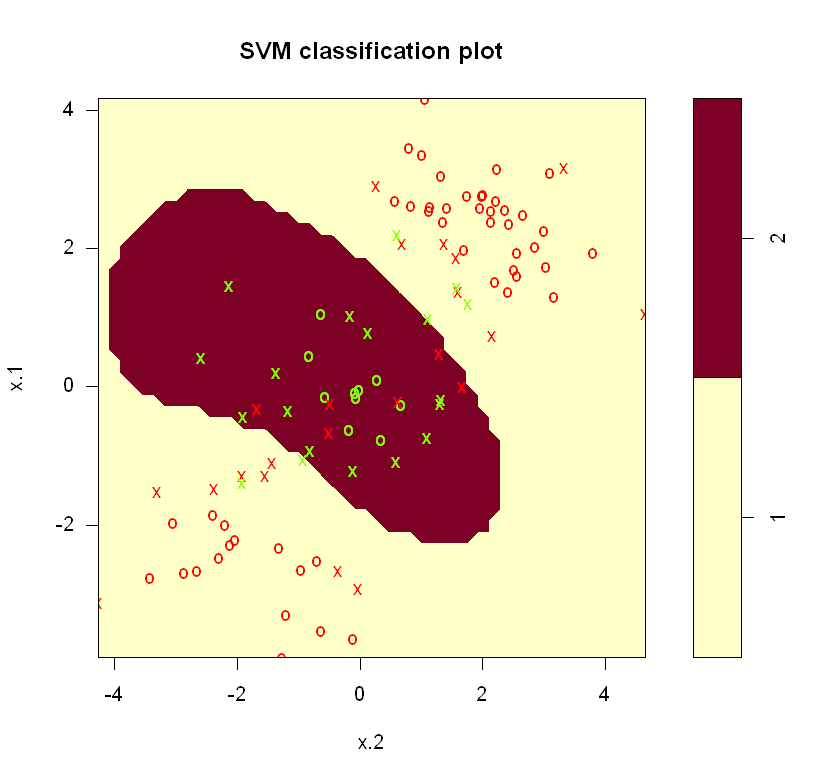

In [47]:
# Fit the SVM model with radial kernel
md_svm <- svm(y ~ ., data=dat[train, ], kernal='radial', gamma=1, cost=1)

# Plot the model
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svm, dat[train, ], symbolPalette=rainbow(4))

In [48]:
# Summary SVM (kernel=radial)
summary(md_svm)


Call:
svm(formula = y ~ ., data = dat[train, ], kernal = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  41

 ( 22 19 )


Number of Classes:  2 

Levels: 
 1 2




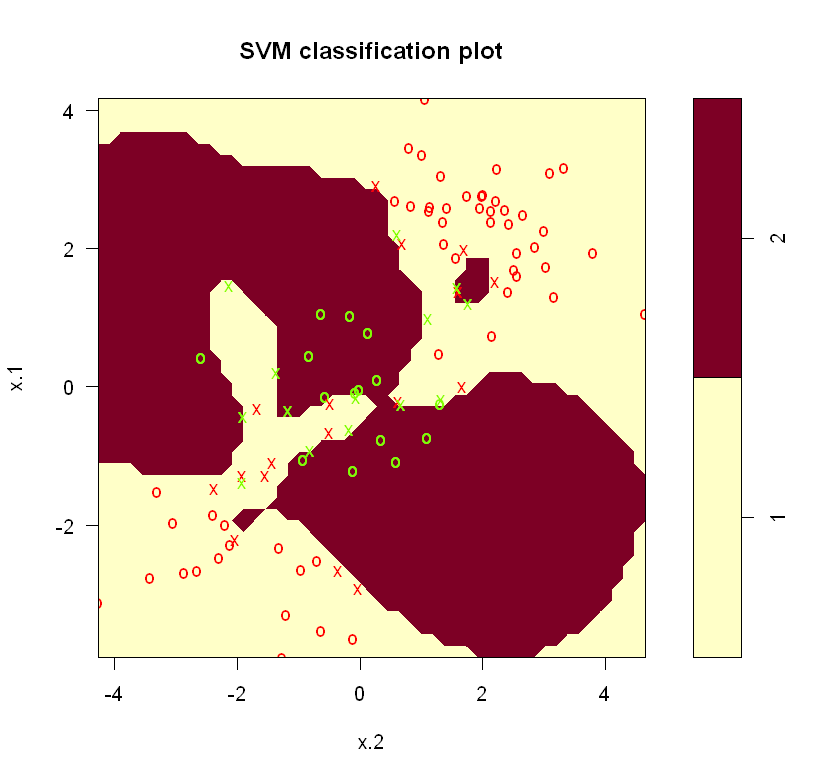

In [49]:
# Fit the SVM model with radial kernel, higher cost
md_svm <- svm(y ~ ., data=dat[train, ], kernal='radial', gamma=1, cost=1e5)  # Increase cost

# Plot the model
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svm, dat[train, ], symbolPalette=rainbow(4))

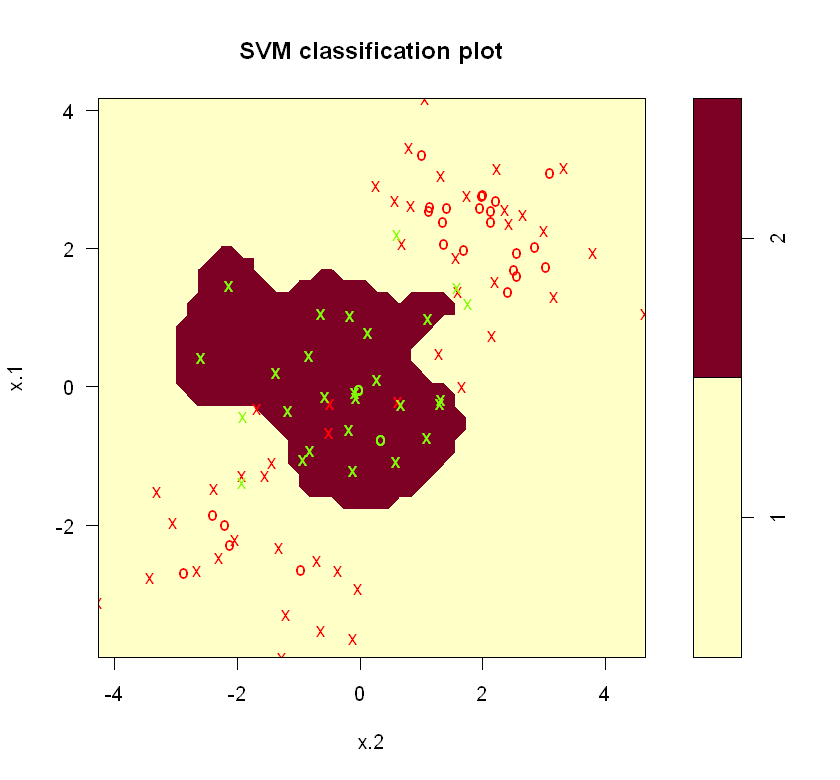

In [50]:
# Fit the SVM model with radial kernel, higher gamma
md_svm <- svm(y ~ ., data=dat[train, ], kernal='radial', gamma=10, cost=1)  # Increase gamma

# Plot the model
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svm, dat[train, ], symbolPalette=rainbow(4))

In [51]:
# Tune cost and gamma for SVM
set.seed(1)
tune_svm <- tune(svm, y ~ ., data=dat[train, ], kernel='radial',
                 ranges=list(cost=c(0.1, 1, 10, 100, 1000),  # List of cost values
                 gamma=c(0.5, 1, 2, 3, 4)))  # List of gamma values

In [52]:
# Summary tuned models
summary(tune_svm)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.28 0.15491933
2  1e+00   0.5  0.12 0.07888106
3  1e+01   0.5  0.15 0.10801234
4  1e+02   0.5  0.17 0.11595018
5  1e+03   0.5  0.23 0.14944341
6  1e-01   1.0  0.25 0.13540064
7  1e+00   1.0  0.14 0.09660918
8  1e+01   1.0  0.16 0.10749677
9  1e+02   1.0  0.21 0.15238839
10 1e+03   1.0  0.20 0.14142136
11 1e-01   2.0  0.28 0.14757296
12 1e+00   2.0  0.15 0.10801234
13 1e+01   2.0  0.19 0.15238839
14 1e+02   2.0  0.18 0.14757296
15 1e+03   2.0  0.23 0.12516656
16 1e-01   3.0  0.28 0.15491933
17 1e+00   3.0  0.15 0.10801234
18 1e+01   3.0  0.20 0.16329932
19 1e+02   3.0  0.20 0.13333333
20 1e+03   3.0  0.27 0.11595018
21 1e-01   4.0  0.29 0.14491377
22 1e+00   4.0  0.16 0.09660918
23 1e+01   4.0  0.18 0.13984118
24 1e+02   4.0  0.21 0.11972190
25 1e+03   4.0  0.31 0

In [53]:
# Prediction and evaluation on test
ypred <- predict(tune_svm$best.model, dat[-train, ])
table(pred=ypred, truth=dat[-train, 'y'])
mean(ypred != dat[-train, 'y'])  # Error rate

    truth
pred  1  2
   1 72  1
   2  7 20

[1] 0.08

### Lab 3: SVM with multiple classes

In [54]:
# Generate sample data with multiple classes
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol=2)

# Create 3 group of data by shifting 2 groups to top-right and bottom-left corners
x[1:100, ] <- x[1:100, ] + 2  # Shift 100 data points to the top-right corner
x[101:150, ] <- x[101:150, ] - 2  # Shift 50 data points to the bottom-left corner
y <- c(rep(1, 150), rep(2, 50))  # Add class 1 and 2

# Add the third class
x <- rbind(x, matrix(rnorm(50 * 2), ncol=2))  # Add 50 more data points
x[201:250, 1] <- x[201:250, 1] + 2  # Shift the new 50 data points to the top-left corner
x[201:250, 2] <- x[201:250, 2] - 2  # Shift the new 50 data points to the top-left corner
y <- c(y, rep(0, 50))  # Add class 0

In [55]:
# Full data
set.seed(1)
dat <- data.frame(x=x, y=as.factor(y))
dat <- dat[sample(250, 250), ]  # Suffle data
head(dat)

# Train data index, test index = -train
set.seed(1)
train <- sample(250, 150)

,x.1,x.2,y
,<dbl>,<dbl>,<fct>
249,2.2368037,-1.6523464,0
68,3.4655549,0.8108867,1
167,-0.2550270,0.6783402,2
129,-2.6816605,-2.8640360,1
162,-0.2386471,1.3140022,2
215,1.4919138,-1.9951156,0


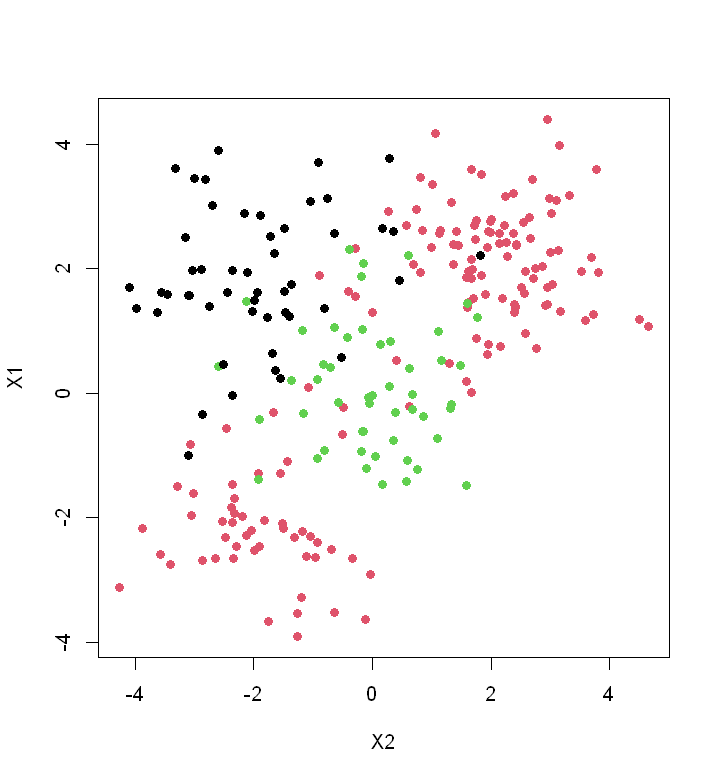

In [56]:
# Plot the data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x[, c(2, 1)], col=(y + 1), pch=19, xlab='X2', ylab='X1')

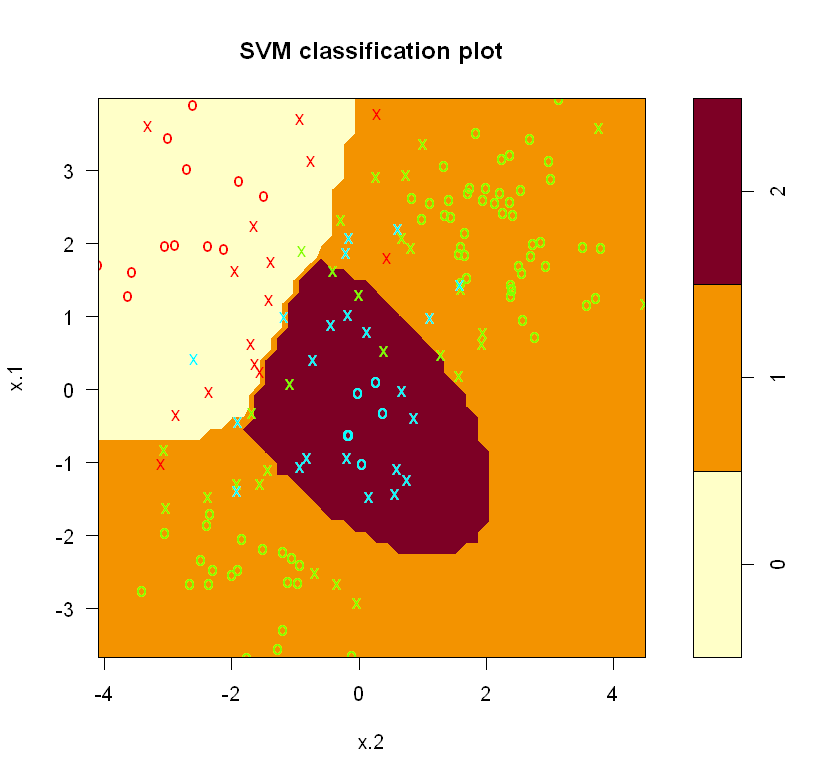

In [57]:
# Fit the SVM model
md_svm <- svm(y ~ ., data=dat[train, ], kernel='radial', cost=1, gamma=0.5)

# Plot the model
options(repr.plot.width=7, repr.plot.height=6.5)
plot(md_svm, dat[train, ], symbolPalette=rainbow(4))

In [58]:
# Tune cost and gamma for SVM
set.seed(1)
tune_svm <- tune(svm, y ~ ., data=dat[train, ], kernel='radial',
                 ranges=list(cost=c(0.1, 1, 10, 100, 1000),  # List of cost values
                 gamma=c(0.5, 1, 2, 3, 4)))  # List of gamma values

In [59]:
# Summary tuned models
summary(tune_svm)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.1266667 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-01   0.5 0.2666667 0.12957671
2  1e+00   0.5 0.1466667 0.10795518
3  1e+01   0.5 0.1266667 0.10159226
4  1e+02   0.5 0.1533333 0.13351839
5  1e+03   0.5 0.1600000 0.12252488
6  1e-01   1.0 0.2800000 0.12881224
7  1e+00   1.0 0.1333333 0.11331154
8  1e+01   1.0 0.1266667 0.09660918
9  1e+02   1.0 0.1466667 0.12491973
10 1e+03   1.0 0.1933333 0.09135469
11 1e-01   2.0 0.3533333 0.14072125
12 1e+00   2.0 0.1333333 0.10423146
13 1e+01   2.0 0.1466667 0.12491973
14 1e+02   2.0 0.1800000 0.09962894
15 1e+03   2.0 0.2333333 0.09558139
16 1e-01   3.0 0.3666667 0.13788526
17 1e+00   3.0 0.1266667 0.09660918
18 1e+01   3.0 0.1600000 0.10036969
19 1e+02   3.0 0.2000000 0.07027284
20 1e+03   3.0 0.2200000 0.08344437
21 1e-01   4.0 0.3666667 0.13788526
22 1e+00   4.0 0.1333333 

In [60]:
# Prediction and evaluation on train
ypred <- predict(tune_svm$best.model, dat[-train, ])
table(pred=ypred, truth=dat[-train, 'y'])
mean(ypred != dat[-train, 'y'])  # Error rate

    truth
pred  0  1  2
   0 18  2  1
   1  3 49  5
   2  2  4 16

[1] 0.17

### Lab 4: Gene Expression Data

The data set consists of expression measurements for 2,308 genes for 4 cancer subtypes.  

Source: https://cran.r-project.org/web/packages/ISLR/ISLR.pdf

In [61]:
# Load data set
library(ISLR)
gene <- ISLR::Khan

# Prepare train, test data set
train <- data.frame(x=gene$xtrain, y=as.factor(gene$ytrain))
test <- data.frame(x=gene$xtest, y=as.factor(gene$ytest))

In [62]:
# The data structure
print(dim(train))
head(train)

[1]   63 2309


,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,⋯,x.2300,x.2301,x.2302,x.2303,x.2304,x.2305,x.2306,x.2307,x.2308,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
V1,0.77334370,-2.438405,-0.4825622,-2.7211350,-1.2170580,0.82780920,1.342604,0.05704174,0.13356890,0.5654274,⋯,-0.02747398,-1.660205,0.58823100,-0.46362400,-3.952845,-5.496768,-1.414282,-0.6476004,-1.76317200,2
V2,-0.07817778,-2.415754,0.4127717,-2.8251460,-0.6262365,0.05448819,1.429498,-0.12024860,0.45679170,0.1590529,⋯,-0.24628420,-0.836325,-0.57128360,0.03478783,-2.478130,-3.661264,-1.093923,-1.2093200,-0.82439550,2
V3,-0.08446916,-1.649739,-0.2413075,-2.8752860,-0.8894054,-0.02747398,1.159300,0.01567648,0.19194180,0.4965847,⋯,0.02498525,-1.059872,-0.40376660,-0.67865270,-2.939352,-2.736450,-1.965399,-0.8058680,-1.13943400,2
V4,0.96561400,-2.380547,0.6252965,-1.7412560,-0.8453664,0.94968680,1.093801,0.81973580,-0.28462010,0.9947322,⋯,0.35711480,-1.893128,0.25510720,0.16330860,-1.021929,-2.077843,-1.127629,0.3315315,-2.17948300,2
V5,0.07566390,-1.728785,0.8526265,0.2726953,-1.8413700,0.32793590,1.251219,0.77144990,0.03091710,0.2783133,⋯,0.06175340,-2.273998,-0.03936472,0.36880110,-2.566551,-1.675044,-1.082050,-0.9652184,-1.83696600,2
V6,0.45881630,-2.875286,0.1358412,0.4053984,-2.0826470,0.13784710,1.733530,0.39642440,0.04583342,0.3520643,⋯,-1.10201800,-1.545994,-0.65778000,0.39008070,-1.660205,-1.651302,-1.130722,-1.1291750,0.04114194,2


In [63]:
# Target variable distribution
table(train$y)  # By counts
round(table(train$y) / nrow(train), 2)  # By percentage


 1  2  3  4 
 8 23 12 20 


   1    2    3    4 
0.13 0.37 0.19 0.32 

In [64]:
# Fit the SVM model
md_svm <- svm(y ~ ., data=train, kernel='linear', cost=10, scale=T)
summary(md_svm)


Call:
svm(formula = y ~ ., data = train, kernel = "linear", cost = 10, 
    scale = T)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [65]:
# Evaluate on train set
table(md_svm$fitted, train$y)
mean(md_svm$fitted != train$y)  # No error

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

[1] 0

In [66]:
# Predict and evaluate on test set
ypred <- predict(md_svm, newdata=test)
table(pred=ypred, truth=test$y)
mean(ypred != test$y)  # 10% error

    truth
pred 1 2 3 4
   1 3 0 0 0
   2 0 6 2 0
   3 0 0 4 0
   4 0 0 0 5

[1] 0.1

## Homework

- Exercise 1 (p.368, Chap.9), 2 (p.368, Chap.9), 4 (p.369, Chap.9), 7 (p.371, Chap.9) and 8 (p.371)

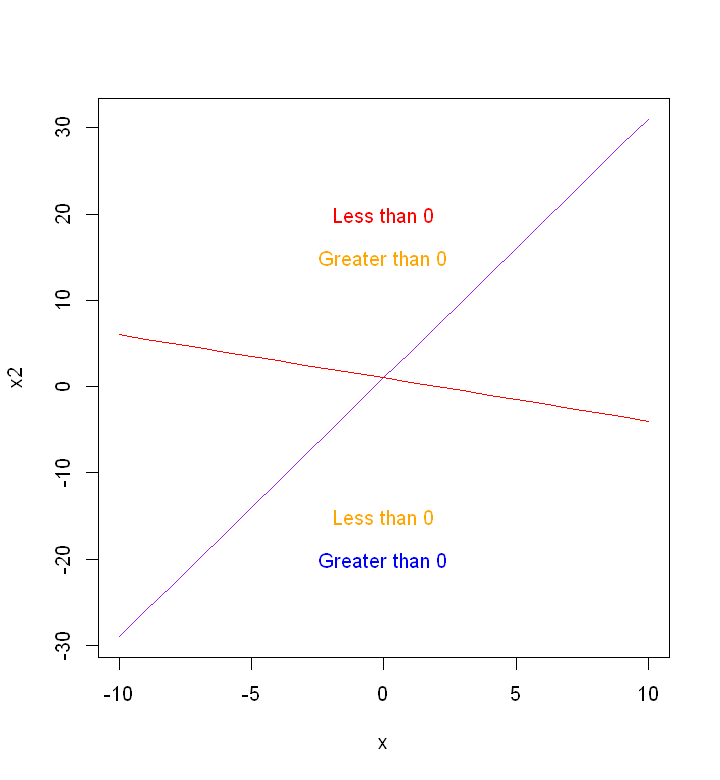

In [15]:
#Exercise 1, Chapter 9

#A)
x <- -10:10
x2 <- 1 + 3 * x
plot(x, x2, type = "l", col = "purple")
text(c(0), c(-20), "Greater than 0", col = "blue")
text(c(0), c(20), "Less than 0", col = "red")

#B)
lines(x, 1 - x1/2, col = "red")
text(c(0), c(-15), "Less than 0", col = "orange")
text(c(0), c(15), "Greater than 0", col = "orange")


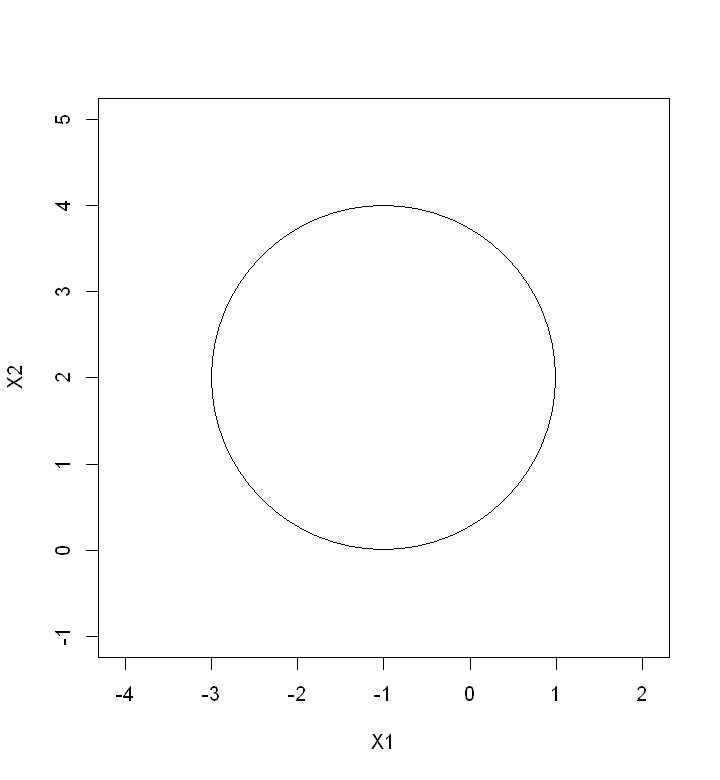

In [19]:
#Exercise 2, Chapter 9

#A)
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)


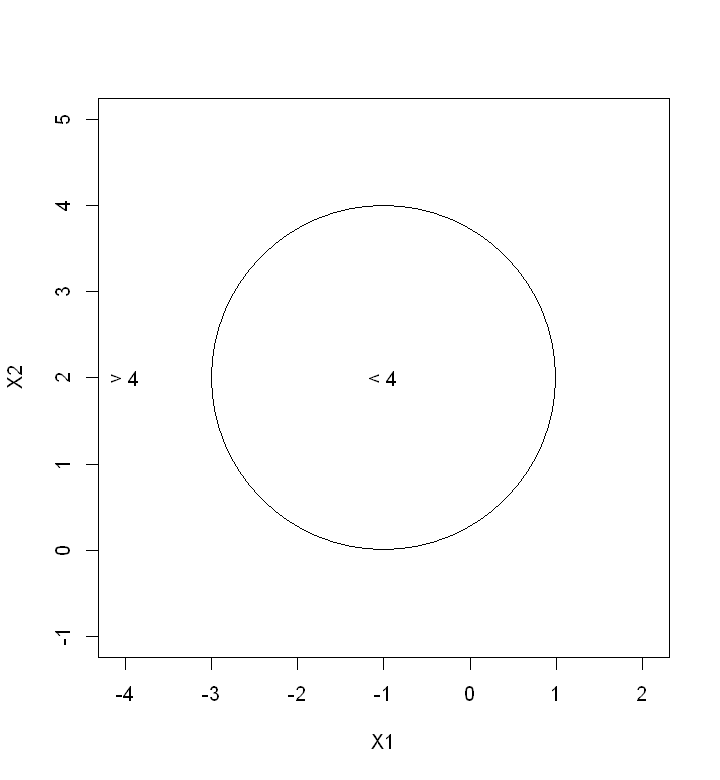

In [20]:
#B)
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")


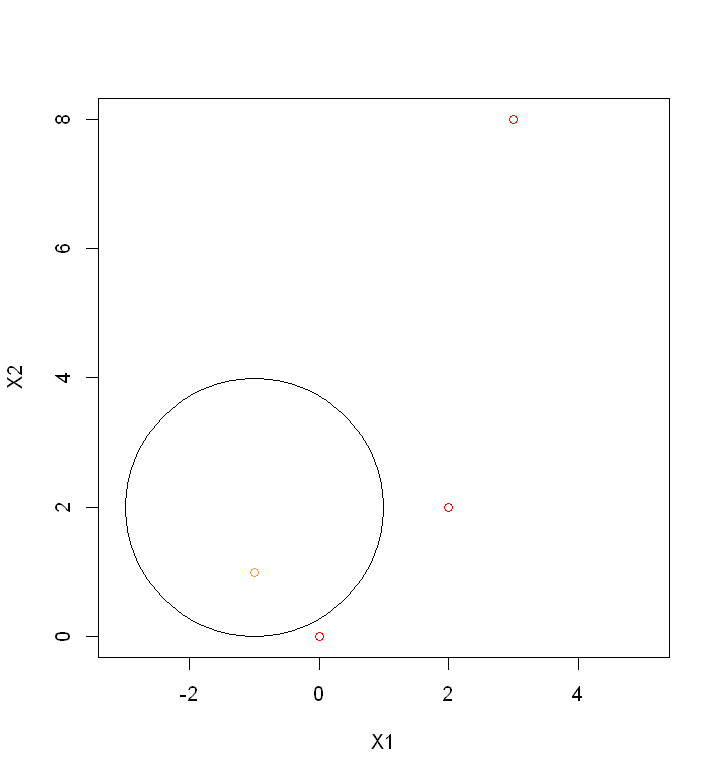

In [21]:
#C)
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("red", "orange", "red", "red"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)


In [ ]:
#D)
#We can expand the equation of the boundary


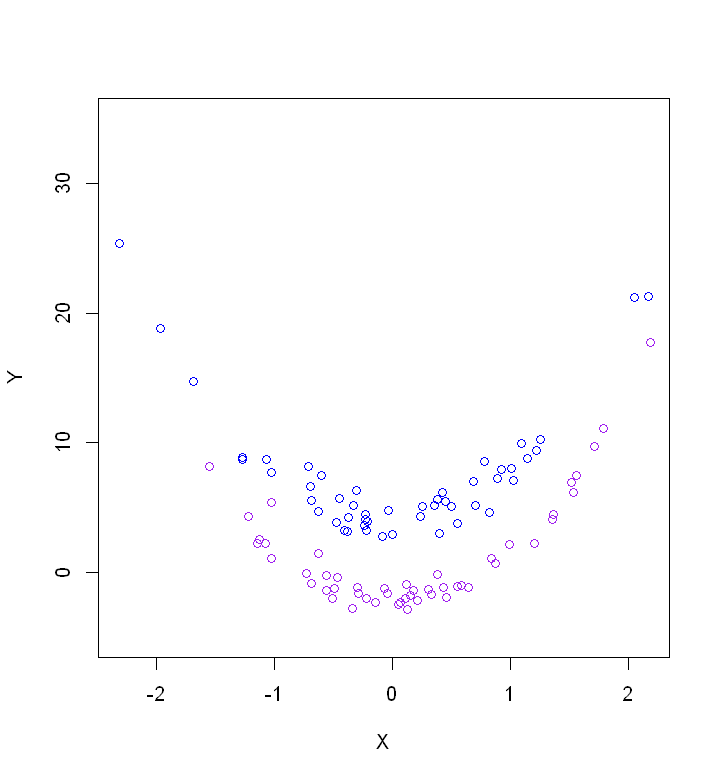

In [28]:
#Exercise 4, Chapter 9
#FIRST FEATURE

library(e1071)
set.seed(123)
x <- rnorm(100)
y <- 4 * x^2 + 1 + rnorm(100)
class <- sample(100, 50)
y[class] <- y[class] + 3
y[-class] <- y[-class] - 3
plot(x[class], y[class], col = "blue", xlab = "X", ylab = "Y", ylim = c(-5, 35))
points(x[-class], y[-class], col = "purple")

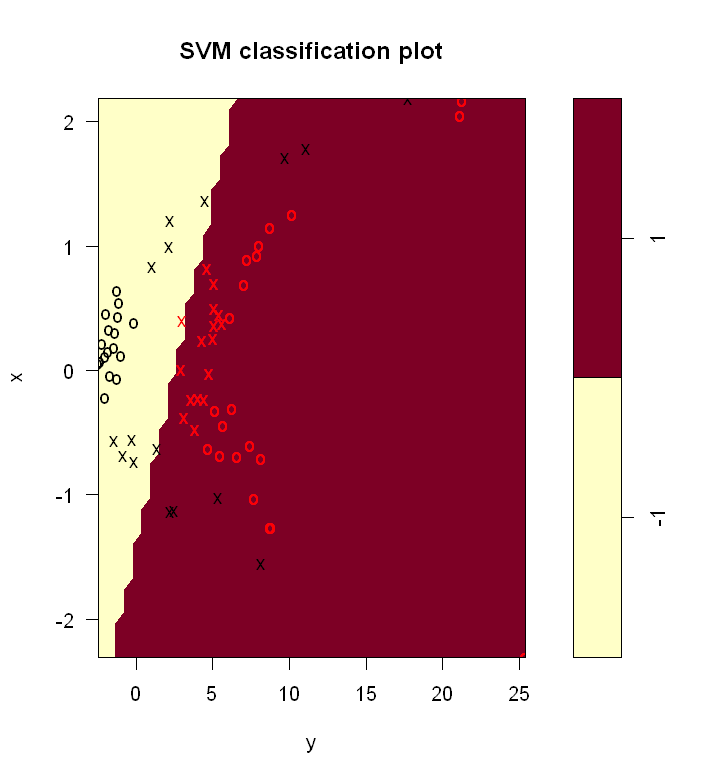

In [32]:
#SECOND FEATURE
K <- rep(-1, 100)
K[class] <- 1
data <- data.frame(x = x, y = y, z = as.factor(K))
train <- sample(100, 70)
data_train <- data[train, ]
data_test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data_train, kernel = "linear", cost = 10)
plot(svm.linear, data_train)

In [33]:
#Exercise 7, Chapter 9

#A)
library(ISLR)
varIABLE <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(varIABLE)

In [34]:
#B)
set.seed(123)
tune <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07634615 0.03928191
2 1e-01 0.04333333 0.03191738
3 1e+00 0.01025641 0.01792836
4 5e+00 0.01538462 0.01792836
5 1e+01 0.01788462 0.01727588
6 1e+02 0.03320513 0.02720447
7 1e+03 0.03320513 0.02720447


In [35]:
#C)
set.seed(123)
tune <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.3034615 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5817308 0.04740051
2  1e-01      2 0.5817308 0.04740051
3  1e+00      2 0.5817308 0.04740051
4  5e+00      2 0.5817308 0.04740051
5  1e+01      2 0.5714744 0.04575370
6  1e+02      2 0.3034615 0.10917787
7  1e-02      3 0.5817308 0.04740051
8  1e-01      3 0.5817308 0.04740051
9  1e+00      3 0.5817308 0.04740051
10 5e+00      3 0.5817308 0.04740051
11 1e+01      3 0.5817308 0.04740051
12 1e+02      3 0.3521154 0.13782036
13 1e-02      4 0.5817308 0.04740051
14 1e-01      4 0.5817308 0.04740051
15 1e+00      4 0.5817308 0.04740051
16 5e+00      4 0.5817308 0.04740051
17 1e+01      4 0.5817308 0.04740051
18 1e+02      4 0.5817308 0.04740051


In [ ]:
#D)

In [36]:
#Exercise 8, Chapter 9
#A)
set.seed(123)
tr <- sample(nrow(OJ), 800)
OJ_train <- OJ[tr, ]
OJ_test <- OJ[-tr, ]

In [37]:
#B)
linear <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(linear)

ERROR: Error in eval(expr, p): object 'OJ.train' not found


In [38]:
#C)
pred <- predict(linear, OJ_train)
table(OJ_train$Purchase, pred)


pred <- predict(linear, OJ_test)
table(OJ_test$Purchase, pred)

ERROR: Error in predict(linear, OJ_train): object 'linear' not found


In [ ]:
#D)

In [ ]:
#E)


In [39]:
#F)
radial <- svm(Purchase ~ ., kernel = "radial", data = OJ_train)
summary(radial)


Call:
svm(formula = Purchase ~ ., data = OJ_train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  367

 ( 181 186 )


Number of Classes:  2 

Levels: 
 CH MM


